In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('bank-full.csv', delimiter = ';')

In [3]:
df.shape

(45211, 17)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [6]:
df.isnull().sum(axis = 0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.shape

(45211, 17)

In [9]:
df['y'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)
df['y'].unique()

array([0, 1])

In [10]:
cols = df.columns

In [11]:
cols

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
num_cols = list(df._get_numeric_data().columns)
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [13]:
type(num_cols)

list

In [14]:
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['poutcome',
 'loan',
 'contact',
 'default',
 'education',
 'marital',
 'housing',
 'month',
 'job']

In [15]:
for col in cat_cols :

    print(col, df[col].unique())


poutcome ['unknown' 'failure' 'other' 'success']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
default ['no' 'yes']
education ['tertiary' 'secondary' 'unknown' 'primary']
marital ['married' 'single' 'divorced']
housing ['yes' 'no']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [16]:
num_cols.remove('y')
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

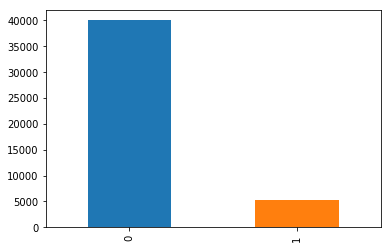

In [17]:
df['y'].value_counts().plot.bar()

In [18]:
df = pd.get_dummies(df,columns = cat_cols, drop_first = True)
df.head()

age  balance  day  duration  campaign  pdays  previous  y  poutcome_other  \
0   58     2143    5       261         1     -1         0  0               0   
1   44       29    5       151         1     -1         0  0               0   
2   33        2    5        76         1     -1         0  0               0   
3   47     1506    5        92         1     -1         0  0               0   
4   33        1    5       198         1     -1         0  0               0   

   poutcome_success     ...       job_entrepreneur  job_housemaid  \
0                 0     ...                      0              0   
1                 0     ...                      0              0   
2                 0     ...                      1              0   
3                 0     ...                      0              0   
4                 0     ...                      0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  job_unemployed  job_unknown  
0               0               0            0  
1               1               0            0  
2               0               0            0  
3               0               0            0  
4               0               0            1  

[5 rows x 43 columns]

In [27]:
len(df.columns)

43

In [20]:

X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  55906
Number of no subscription in oversampled data 27953
Number of subscription 27953
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [28]:
data_final_vars=df.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 50)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


In [29]:
print('Selected features: %s' % list(os_data_X.columns[rfe.support_]))

Selected features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'loan_yes', 'contact_telephone', 'contact_unknown', 'default_yes', 'education_secondary', 'education_tertiary', 'education_unknown', 'marital_married', 'marital_single', 'housing_yes', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown']


In [41]:
X=os_data_X[list(os_data_X.columns[rfe.support_])]
y=os_data_y['y']

In [25]:
from sklearn.feature_selection import RFECV
%matplotlib inline
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(os_data_X, os_data_y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(os_data_X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
#plt.figure(figsize=(10,6))
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.show()

Optimal number of features: 42
Selected features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'loan_yes', 'contact_telephone', 'contact_unknown', 'default_yes', 'education_secondary', 'education_tertiary', 'education_unknown', 'marital_married', 'marital_single', 'housing_yes', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown']


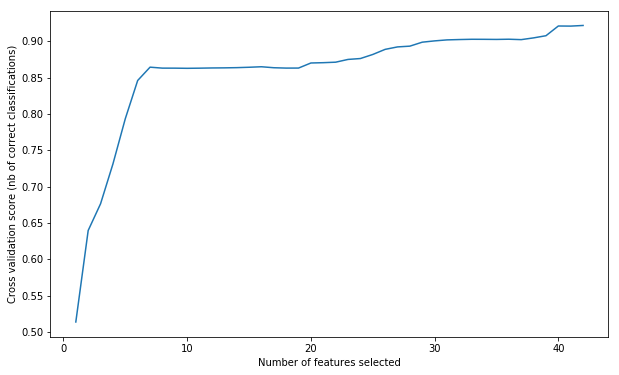

In [26]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [33]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(float), X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.195987
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.717     
Dependent Variable:  y                 AIC:               21997.7450
Date:                2019-03-28 23:34  BIC:               22372.8649
No. Observations:    55906             Log-Likelihood:    -10957.   
Df Model:            41                LL-Null:           -38751.   
Df Residuals:        55864             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
age                  0.0441   0.0016  28.0679 0.0000  0.0410  0.0472
balance              0.0000 

In [42]:
y.isnull().sum()

0

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7876  492]
 [ 653 7751]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8368
           1       0.94      0.92      0.93      8404

   micro avg       0.93      0.93      0.93     16772
   macro avg       0.93      0.93      0.93     16772
weighted avg       0.93      0.93      0.93     16772



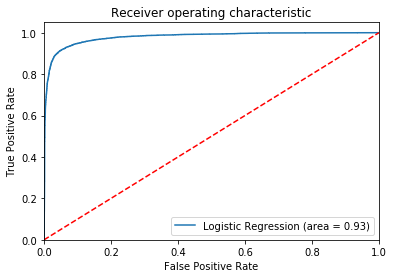

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()